# Operations on distribution functions
In this example, we demonstrate various operations on distribution functions using the probabilistic library.

### Define a stochastic variable
First, we import the necessary packages:

In [924]:
from probabilistic_library import DistributionType, Stochast, StandardNormal
from utils.plotting import plot_dist
import numpy as np

Next, we create a stochastic variable object:

In [925]:
stochast = Stochast()

Let's consider a stochastic variable, which is uniformly distributed over the interval $[-1, 1]$. This is defined as follows:

In [926]:
stochast.distribution = DistributionType.uniform
stochast.minimum = -1
stochast.maximum = 1

The properties of this distribution are:

In [927]:
print(f"mean = {stochast.mean}")
print(f"std  = {stochast.deviation}")
print(f"variation coefficient  = {stochast.variation}")

mean = 0.0
std  = 0.5773502691896257
variation coefficient  = 0.0


These are derived properties, but can also be set explicitly (leading to the update of the other parameters):

In [928]:
stochast.mean = 2.0
stochast.deviation = 1.0

print(f"minimum = {stochast.minimum}")
print(f"maximum = {stochast.maximum}")
print(f"variation coefficient = {stochast.variation}")

minimum = 0.2679491924311228
maximum = 3.732050807568877
variation coefficient = 0.49999999999999994


In [929]:
stochast.mean = 2.0
stochast.variation = 1.0

print(f"minimum = {stochast.minimum}")
print(f"maximum = {stochast.maximum}")
print(f"std  = {stochast.deviation}")

minimum = -1.4641016151377544
maximum = 5.464101615137754
std  = 1.9999999999999998


### Quantiles

A quantile can be calculated with `stochast.get_quantile()`, for example:

In [930]:
p = 0.75
print(f"x({p}) {stochast.get_quantile(p)}")

x(0.75) 3.7320508075688776


Another option is to use the function `StandardNormal.get_u_from_p()`, which converts the non-exceeding probability of $0.75$ into the corresponding value in the standard normal space ($u$-space). Subsequently, `stochast.get_x_from_u()` translates it back to the original space ($x$-space).

In [931]:
u = StandardNormal.get_u_from_p(p)
print(f"x({p}) = {stochast.get_x_from_u(u)}")

x(0.75) = 3.7320508075688776


### Design value

A `design_value` of a variable is defined as the value obtained by dividing the value corresponding to a specific `design_quantile` by the `design_factor`. For example:

In [932]:
stochast.design_quantile = 0.75
stochast.design_factor = 0.99

print(f"design value = {stochast.design_value}")
print(f"minimum = {stochast.minimum}")
print(f"maximum = {stochast.maximum}")
print(f"std  = {stochast.deviation}")
print(f"variation coefficient  = {stochast.variation}")

design value = 3.769748290473614
minimum = -1.4641016151377544
maximum = 5.464101615137754
std  = 1.9999999999999998
variation coefficient  = 0.9999999999999999


The `design_value` can be set explicitely, leading to an update of the properties of the random variable (while `design_quantile`, `design_factor` and `variation` remain unchanged):

In [933]:
stochast.design_value = 3.5

print(f"design quantile = {stochast.design_quantile}")
print(f"design factor = {stochast.design_factor}")
print(f"minimum = {stochast.minimum}")
print(f"maximum = {stochast.maximum}")
print(f"std  = {stochast.deviation}")
print(f"variation coefficient  = {stochast.variation}")

design quantile = 0.75
design factor = 0.99
minimum = -1.3593370081945169
maximum = 5.07311477919061
std  = 1.856888885498046
variation coefficient  = 0.9999999999999998


### Truncated distribution function
Let's consider a normal distribution function with a `location` of $0.0$ and a `scale` of $1.0$:

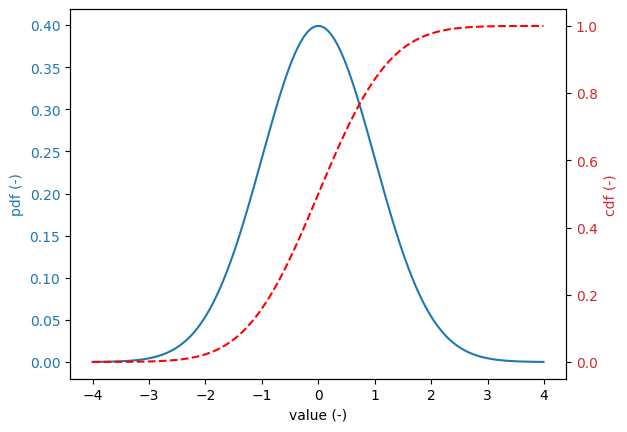

In [934]:
stochast = Stochast()
stochast.distribution = DistributionType.normal
stochast.location = 0.0
stochast.scale = 1.0

val_grid = np.arange(stochast.location-4.0, stochast.location+4.0, 0.01)
plot_dist(val_grid, stochast)

To truncate a distribution, we use the `truncated` attribute.

In [935]:
stochast.truncated = True

The truncation interval is specified using the `minimum` and `maximum` properties. If these are not defined, the original domain of the distribution is used (i.e., no truncation is applied).

Suppose we want to truncate this distribution to the interval $[-0.5, \infty)$. If this is the first time truncation is applied in the project, it is sufficient to specify only the `minimum` value:

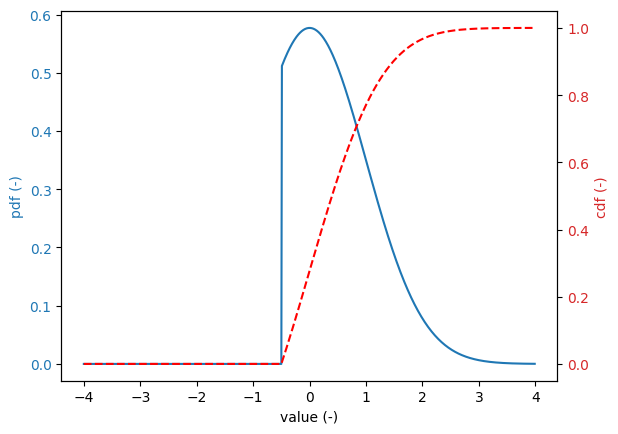

In [936]:
stochast.minimum = -0.5

plot_dist(val_grid, stochast)

If we want to truncate the same distribution to the interval $(-\infty, 0.5]$, we need to specify both the `minimum` and `maximum` properties. Otherwise, the minimum would remain set to $-0.5$.

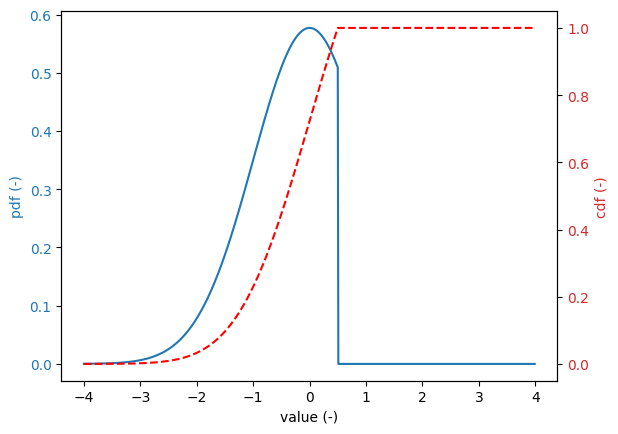

In [937]:
stochast.minimum = -np.inf
stochast.maximum = 0.5

plot_dist(val_grid, stochast)

Next, we truncate the same distribution to the interval $[-0.5, 0.5]$:

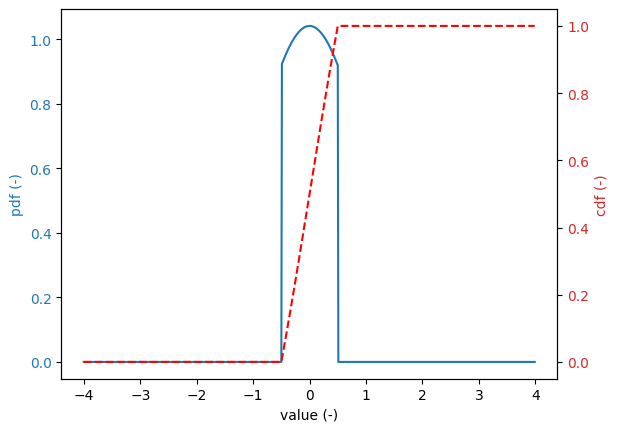

In [938]:
stochast.minimum = -0.5
stochast.maximum = 0.5

plot_dist(val_grid, stochast)

### Inverted distribution function

Let's consider a log-normal distribution function with a `location` of $1.0$, a `scale` of $0.5$ and a `shift` of $0.0$:

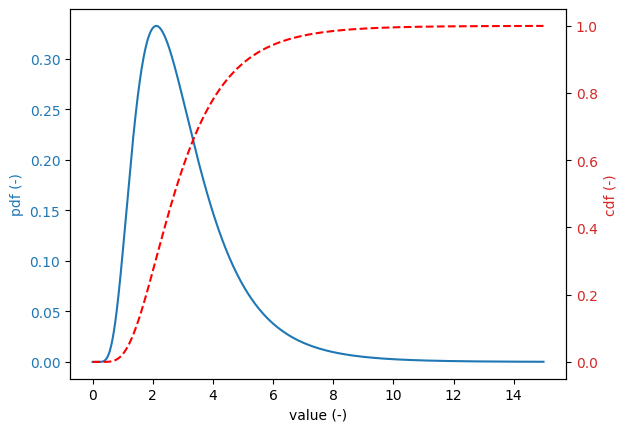

In [939]:
stochast = Stochast()
stochast.distribution = DistributionType.log_normal
stochast.location = 1.0
stochast.scale = 0.5
stochast.shift = 0.0

val_grid = np.arange(stochast.shift, stochast.shift+15.0, 0.01)
plot_dist(val_grid, stochast)

We want to invert this distribution function with respect to the `shift` value. Here's how it can be done:

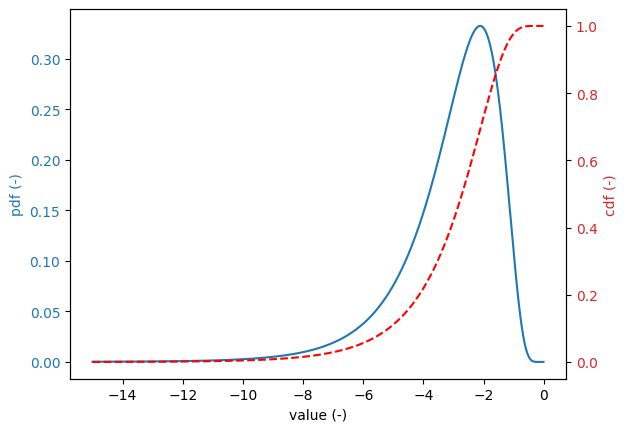

In [940]:
stochast.inverted = True

val_grid = np.arange(stochast.shift-15.0, stochast.shift, 0.01)
plot_dist(val_grid, stochast)

### Fit parameters of a distribution function
It is also possible to estimate parameters of a distribution function from data. In this example, we consider the following dataset:

In [941]:
data = [2.3, 0.0, -1.0, 2.6, 2.7, 2.8, 3.3, 3.4, 1.0, 3.0, 0.0, -2.0, -1.0]

Let's consider a normal distribution. By using `stochast.fit()`, we obtain the fitted `mean` and `deviation`:

In [942]:
stochast = Stochast()
stochast.distribution = DistributionType.normal
stochast.fit(data)

print(f"fitted location = {stochast.location}, scale = {stochast.scale}")

fitted location = 1.3153846153846152, scale = 1.8959809043720852


The goodness of fit can be assessed using the Kolmogorov-Smirnov test through the `get_ks_test()` method:

In [943]:
print(f"kolmogorov smirnov test = {stochast.get_ks_test(data)}")

kolmogorov smirnov test = 0.23669173779063168


When we consider a log-normal distribution, the fitted parameters are as follows:

In [944]:
stochast = Stochast()
stochast.distribution = DistributionType.log_normal
stochast.fit(data)
print(f"fitted location = {stochast.location}, scale = {stochast.scale}")
print(f"mean = {stochast.mean}, std = {stochast.deviation}")

fitted location = 1.5964855623845133, scale = 0.4261942592095209
mean = 1.4049020870683506, std = 2.412211284018044


The result of the goodness-of-fit test is:

In [945]:
print(f"kolmogorov smirnov test = {stochast.get_ks_test(data)}")

kolmogorov smirnov test = 0.2550238105742991
